In [1]:
# --- Librerie Standard e Utilità ---
import os
import json
import random
import numpy as np
from tqdm import tqdm

# --- Machine Learning e Processamento Dati ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# --- Ottimizzazione e Monitoraggio ---
import optuna
import wandb

# --- Moduli Personalizzati ---
from training_utils import *
from testing_utils import *
from plotting_utils import *
from uncertainty_utils import *

In [2]:
csvs = ['./remote_results/final_results/SAMPLE15_0000.csv',
        './remote_results/final_results/SAMPLE15_0500.csv',
        './remote_results/final_results/SAMPLE15_0700.csv',
        './remote_results/final_results/SAMPLE15_0800.csv',
        './remote_results/final_results/SAMPLE15_0850.csv',
        './remote_results/final_results/SAMPLE15_0900.csv',
        './remote_results/final_results/SAMPLE15_0950.csv',
        './remote_results/final_results/SAMPLE15_0990.csv',
        './remote_results/final_results/SAMPLE15_0995.csv',
        './remote_results/final_results/SAMPLE15_1000.csv']
csvs2 = ['./remote_results/final_results/THR101.csv',
        './remote_results/final_results/THR125.csv',
        './remote_results/final_results/THR150.csv',
        './remote_results/final_results/THR170.csv',
        './remote_results/final_results/THR175.csv',
        './remote_results/final_results/THR180.csv',
        './remote_results/final_results/THR185.csv',
        './remote_results/final_results/THR190.csv',
        './remote_results/final_results/THR195.csv',
        './remote_results/final_results/THR199.csv']

In [3]:
cols = ['success', 'collisions', 'reward', 'lenght', 'distance_traveled', 'path_length_ratio', 'SPL', 'cbf_time', 'uf_time', 'policy_time', 'unity_time',   'seed']

--- Inizio elaborazione ---


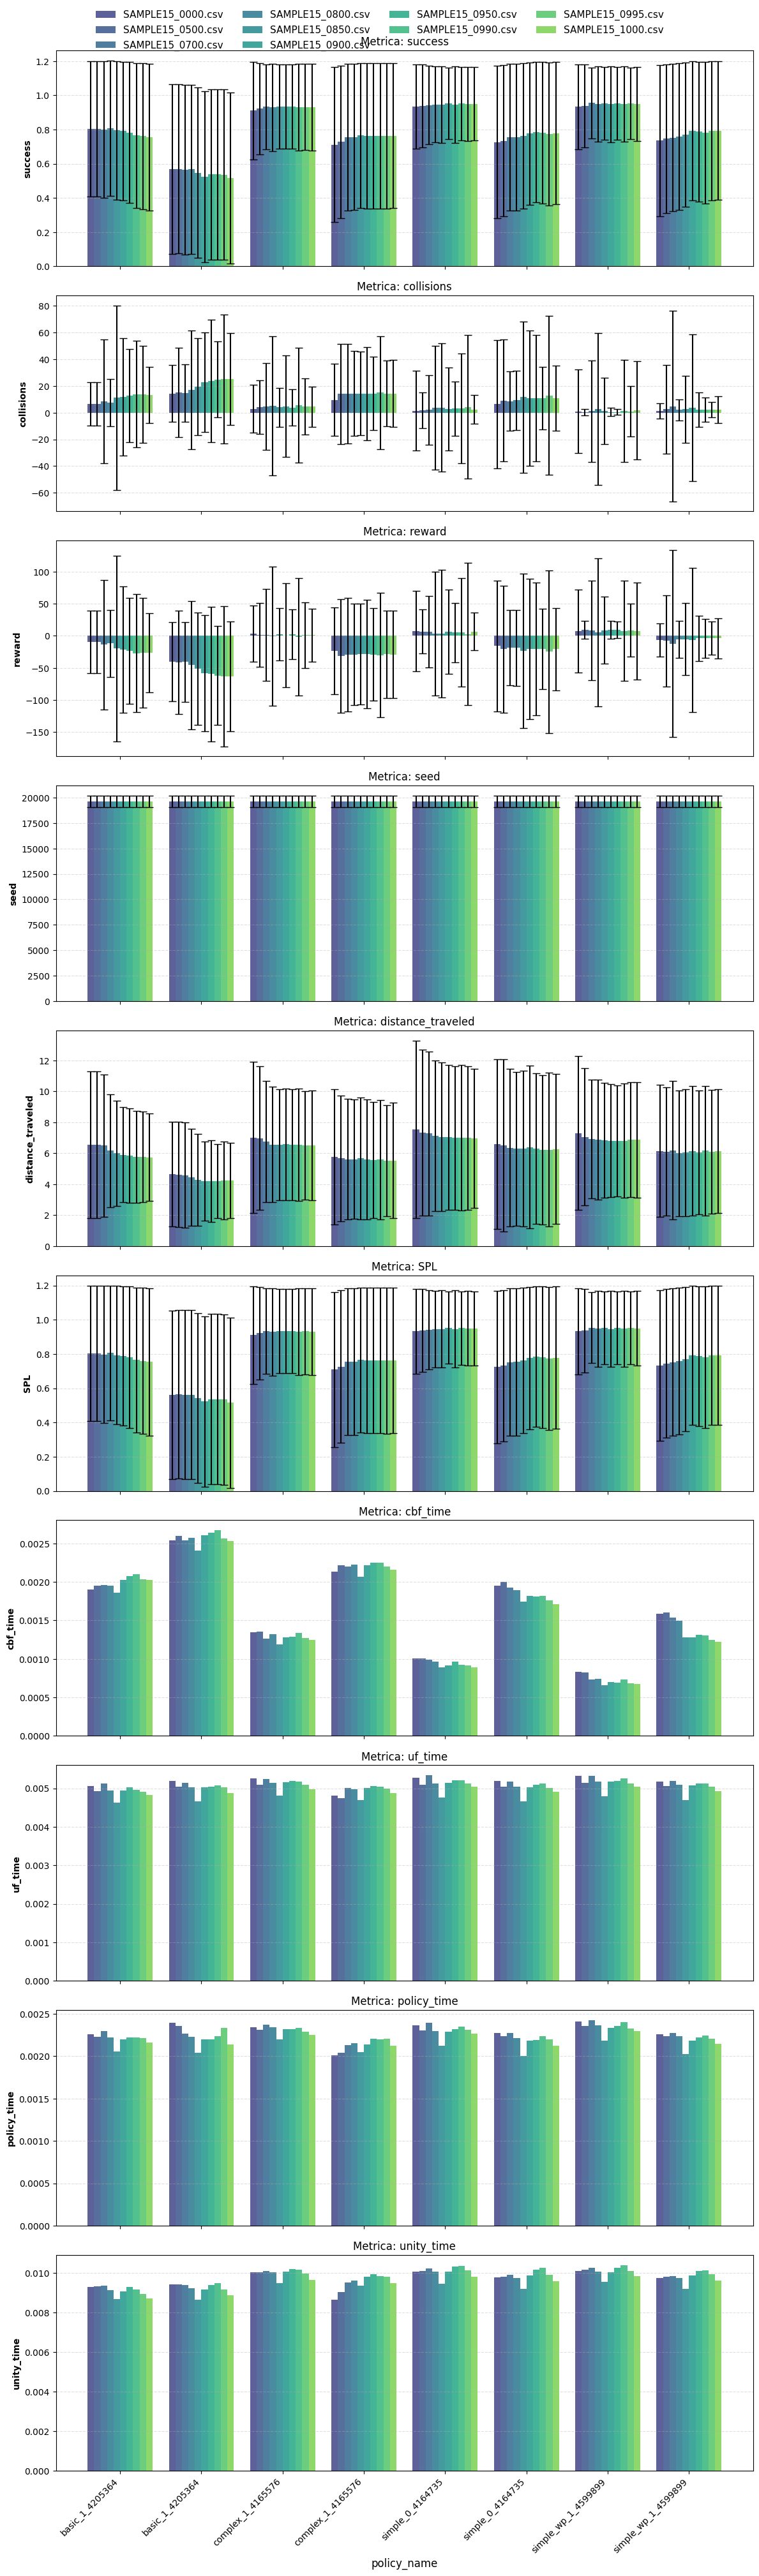

In [4]:
plotta_confronto_csv_final(csvs, 0, 'policy_name', cols)

In [5]:
a, b = load_test_data(csvs)

In [6]:
print(f'Media statistiche sui threshold per {b[1]}')
pd.concat([pd.DataFrame(calculate_stats_from_list(a[1][key])) for key in a[1]]).groupby(level=0).mean()

Media statistiche sui threshold per simple_0_4164735


,id,success,collisions,reward,length,seed,distance_traveled,global_avg_dist_obstacle,global_avg_visibility,global_avg_dispersion,global_characteristic_dimension,path_tortuosity,path_length,velocity,weighted_success,SPL,SPL2
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
max,8.000000,1.000000,1534.400000,21.039305,1999.000000,20617.000000,47.168335,5.797514,17.160612,10.981656,19.986458,8.811502,82.207108,0.025230,3.452836,1.000000,6.413842
mean,3.990875,0.854850,6.475500,-7.516414,598.129300,19617.500000,6.733102,2.968823,8.913405,6.472388,9.096591,1.177845,21.058383,0.016299,0.931397,0.853449,2.652486
min,0.000000,0.000000,0.000000,-3088.478168,21.200000,18618.000000,0.160025,1.679529,2.871429,1.755062,3.371429,1.000000,1.599999,0.000112,0.000000,0.000000,0.000000
p0,0.000000,0.000000,0.000000,-3088.478168,21.200000,18618.000000,0.160025,1.679529,2.871429,1.755062,3.371429,1.000000,1.599999,0.000112,0.000000,0.000000,0.000000
p1,0.000000,0.000000,0.000000,-218.143599,48.798000,18637.990000,0.655566,1.942019,4.267150,2.878461,4.687367,1.000000,1.600000,0.000814,0.000000,0.000000,0.000000
p10,0.000000,0.000000,0.000000,-43.821401,114.790000,18817.900000,1.936251,2.176587,5.623652,4.101794,5.814075,1.000000,6.400000,0.005439,0.000000,0.000000,0.000000
p15,1.000000,0.700000,0.000000,-20.017993,146.500000,18917.850000,2.422912,2.223627,5.900186,4.346510,6.033808,1.000000,8.158431,0.009036,0.700000,0.660490,0.957702
p20,1.000000,1.000000,0.000000,-3.466942,173.960000,19017.800000,2.948904,2.275687,6.133790,4.531676,6.250957,1.000000,9.859645,0.011855,1.000000,1.000000,2.223250
p25,2.000000,1.000000,0.000000,3.838709,203.350000,19117.750000,3.362083,2.320872,6.352195,4.709931,6.470618,1.000000,11.459644,0.014138,1.000000,1.000000,2.667207


Episodi per ['basic_1_4205364']: 1611.2
Episodi per ['simple_0_4164735']: 1630.9
Episodi per ['simple_wp_1_4599899']: 1636.6
Episodi per ['complex_1_4165576']: 1618.9
Episodi per ['complex_wp_1_4611744']: 0.0


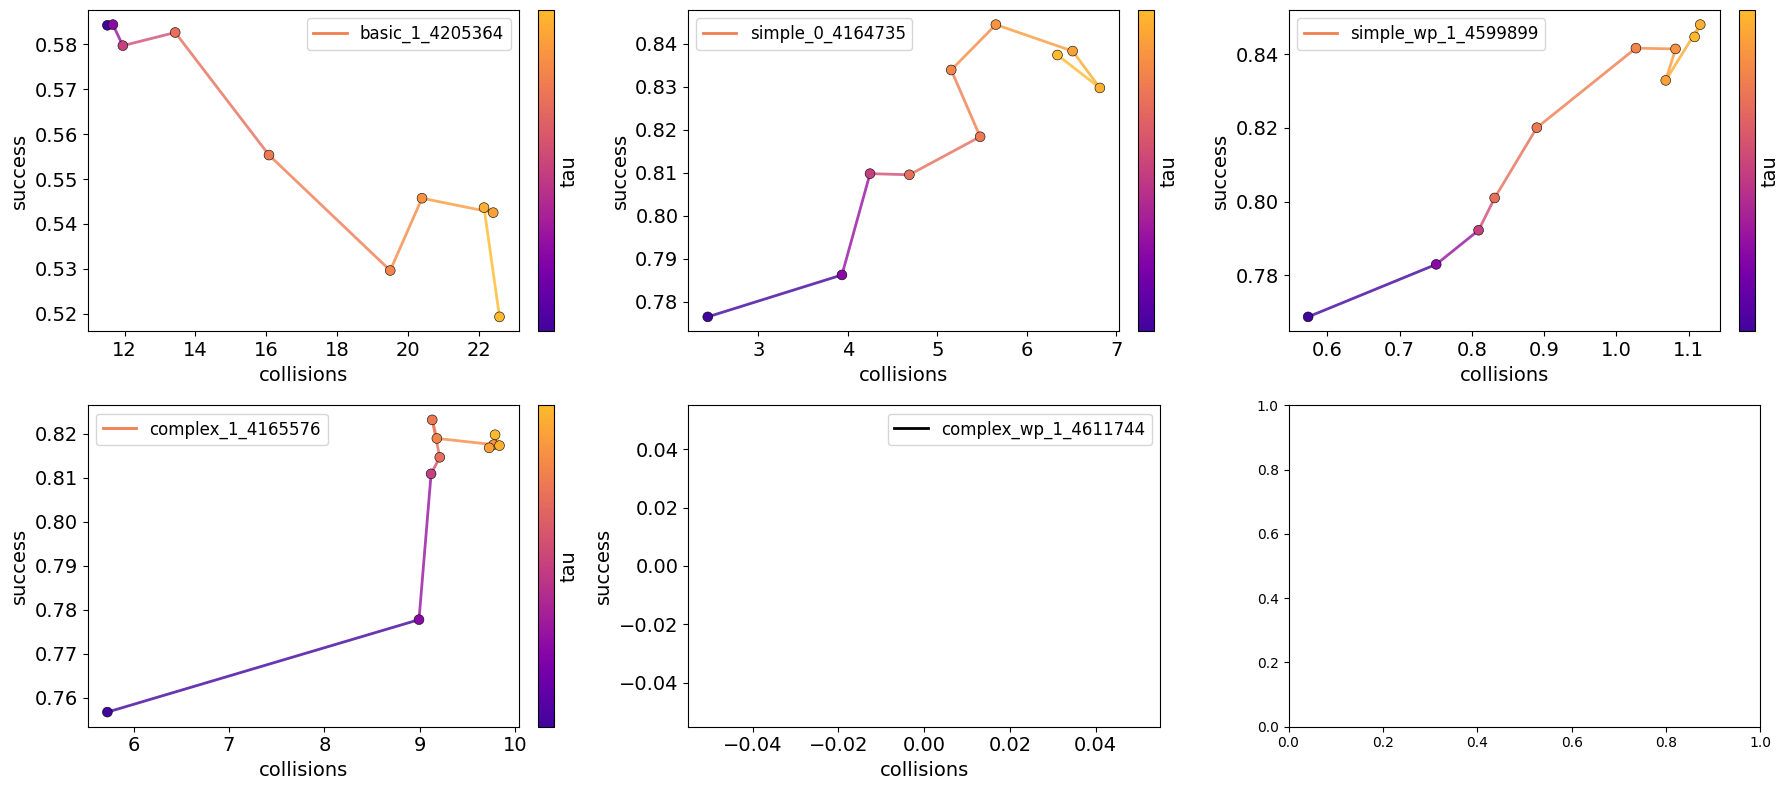

In [18]:
multy_plot_filtered(csvs, 'collisions', 'success', 3, lambda x: True, 0.1)

# Episodi difficili (pt > 1.2)

Episodi per ['basic_1_4205364']: 606.2
Episodi per ['simple_0_4164735']: 609.0
Episodi per ['simple_wp_1_4599899']: 614.0
Episodi per ['complex_1_4165576']: 604.7
Episodi per ['complex_wp_1_4611744']: 0.0


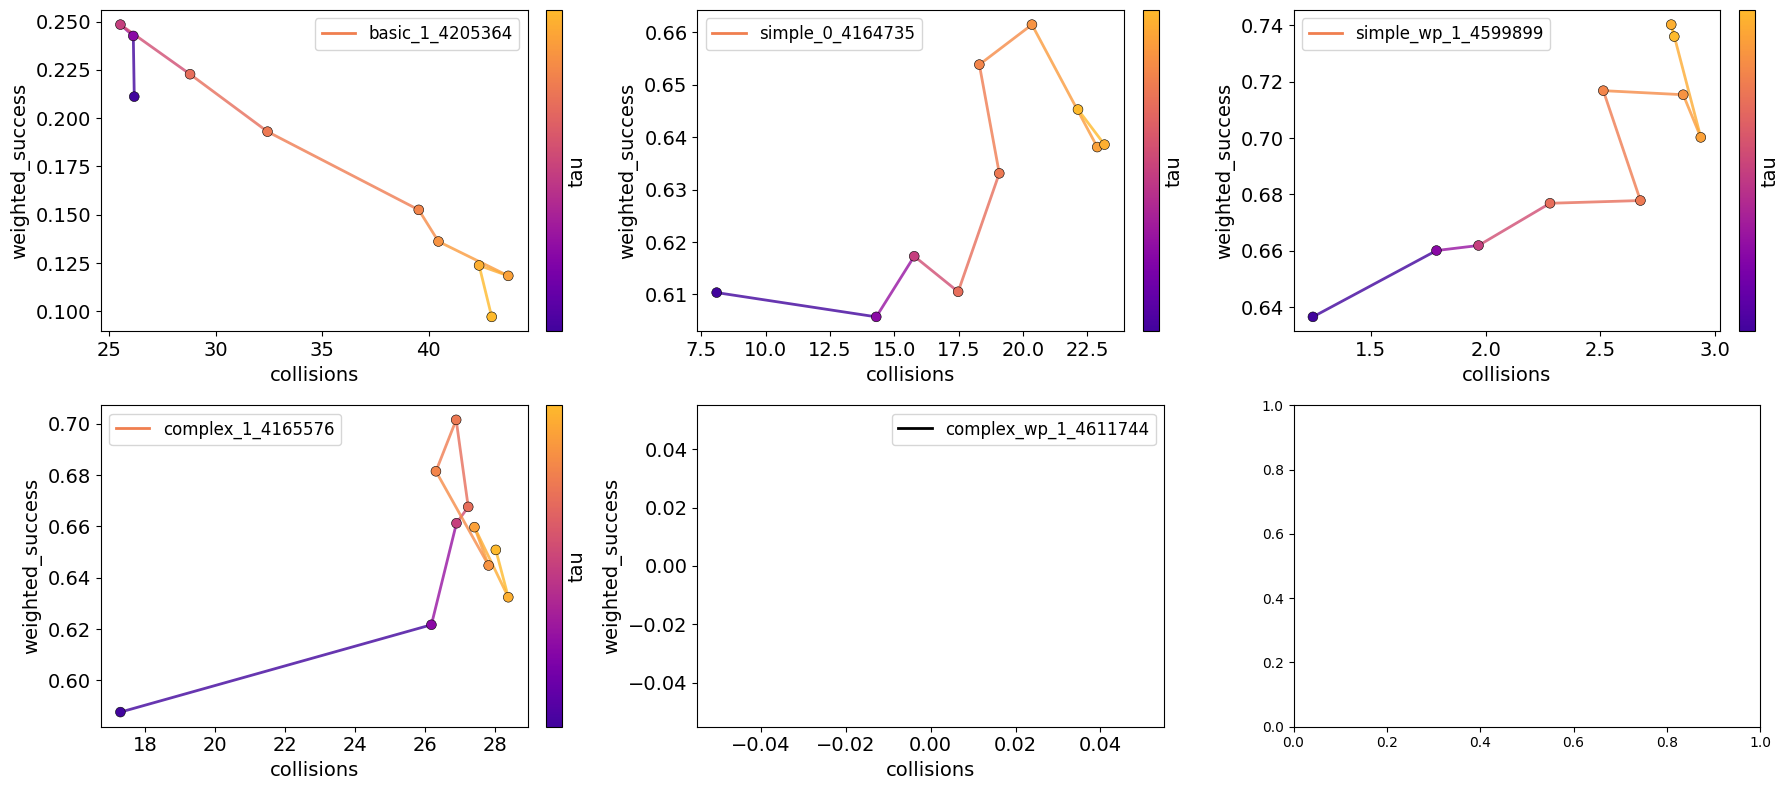

In [7]:
multy_plot_filtered(csvs, 'collisions', 'weighted_success', 3, lambda x: ( x['path_tortuosity'] > 1.2), 0.05)

Episodi per ['basic_1_4205364']: 604.9
Episodi per ['simple_0_4164735']: 609.0
Episodi per ['simple_wp_1_4599899']: 613.8
Episodi per ['complex_1_4165576']: 604.5
Episodi per ['complex_wp_1_4611744']: 0.0


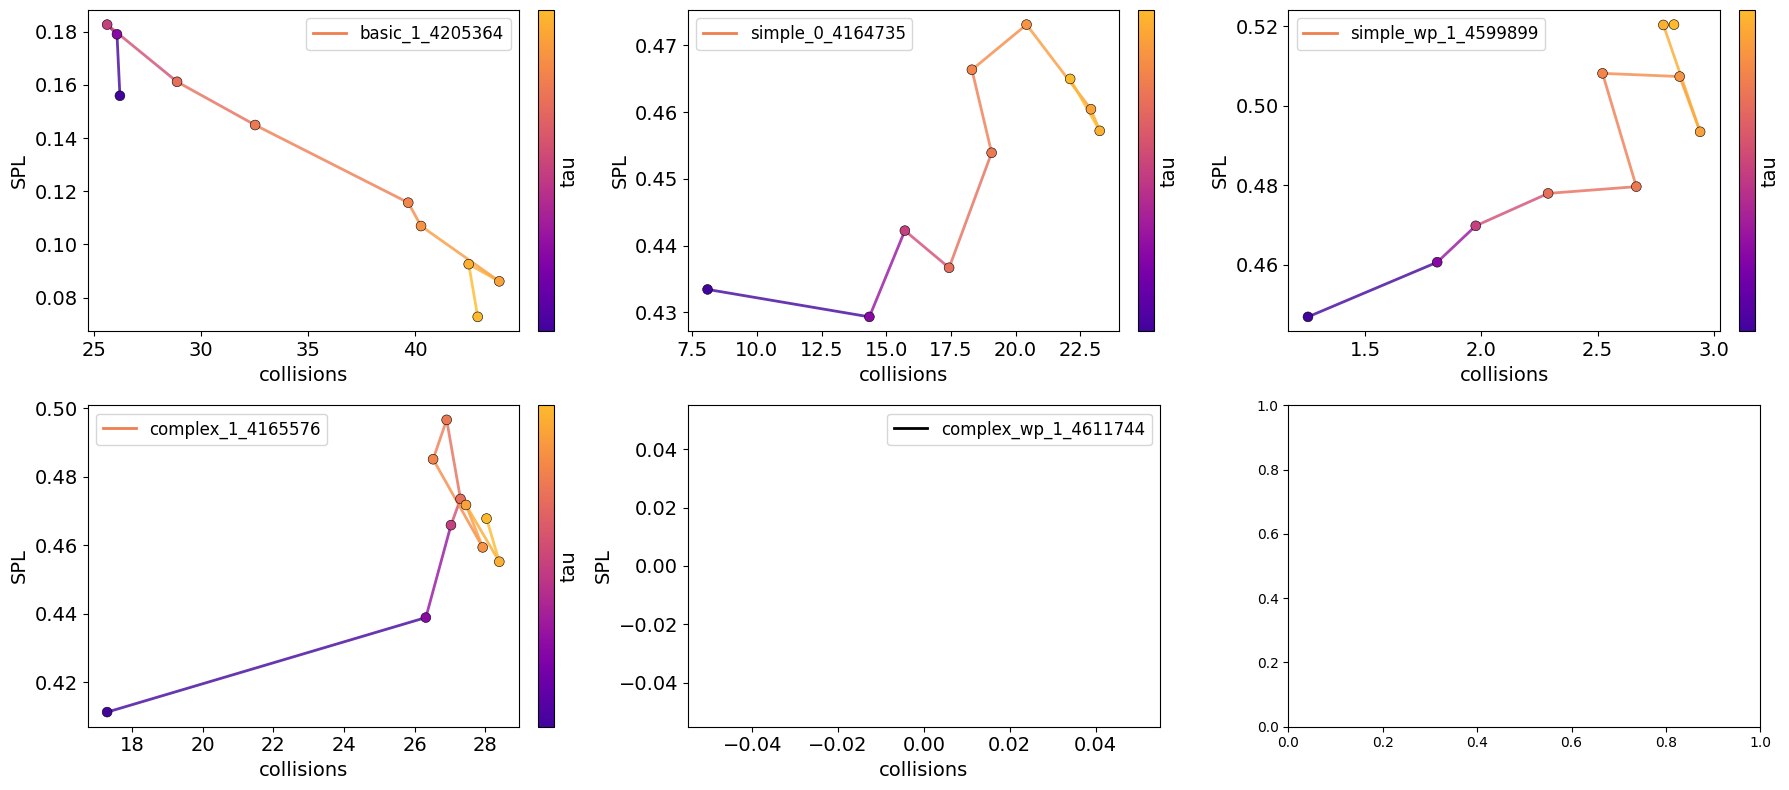

In [8]:
multy_plot_filtered(csvs, 'collisions', 'SPL', 3, lambda x: ( x['path_tortuosity'] > 1.2), 0.05)

# Episodi Semplici (pt < 1.2)

Episodi per ['basic_1_4205364']: 1203.4
Episodi per ['simple_0_4164735']: 1212.8
Episodi per ['simple_wp_1_4599899']: 1207.6
Episodi per ['complex_1_4165576']: 1207.4
Episodi per ['complex_wp_1_4611744']: 0.0


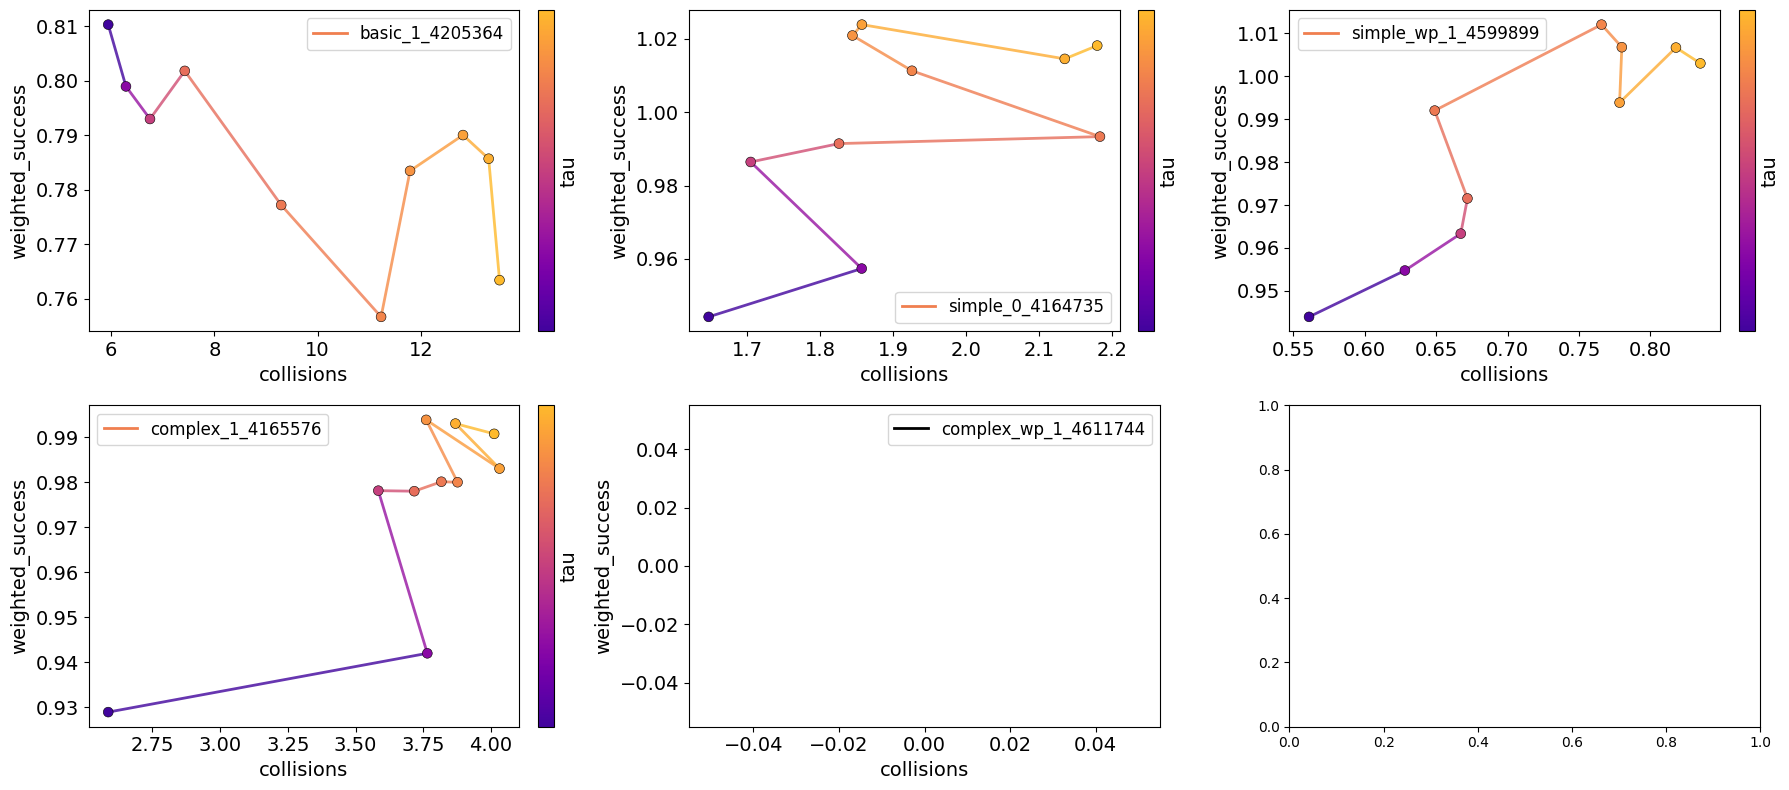

In [9]:
multy_plot_filtered(csvs, 'collisions', 'weighted_success', 3, lambda x: ( x['path_tortuosity'] < 1.2), 0.05)

Episodi per ['basic_1_4205364']: 1203.4
Episodi per ['simple_0_4164735']: 1212.7
Episodi per ['simple_wp_1_4599899']: 1206.6
Episodi per ['complex_1_4165576']: 1206.8
Episodi per ['complex_wp_1_4611744']: 0.0


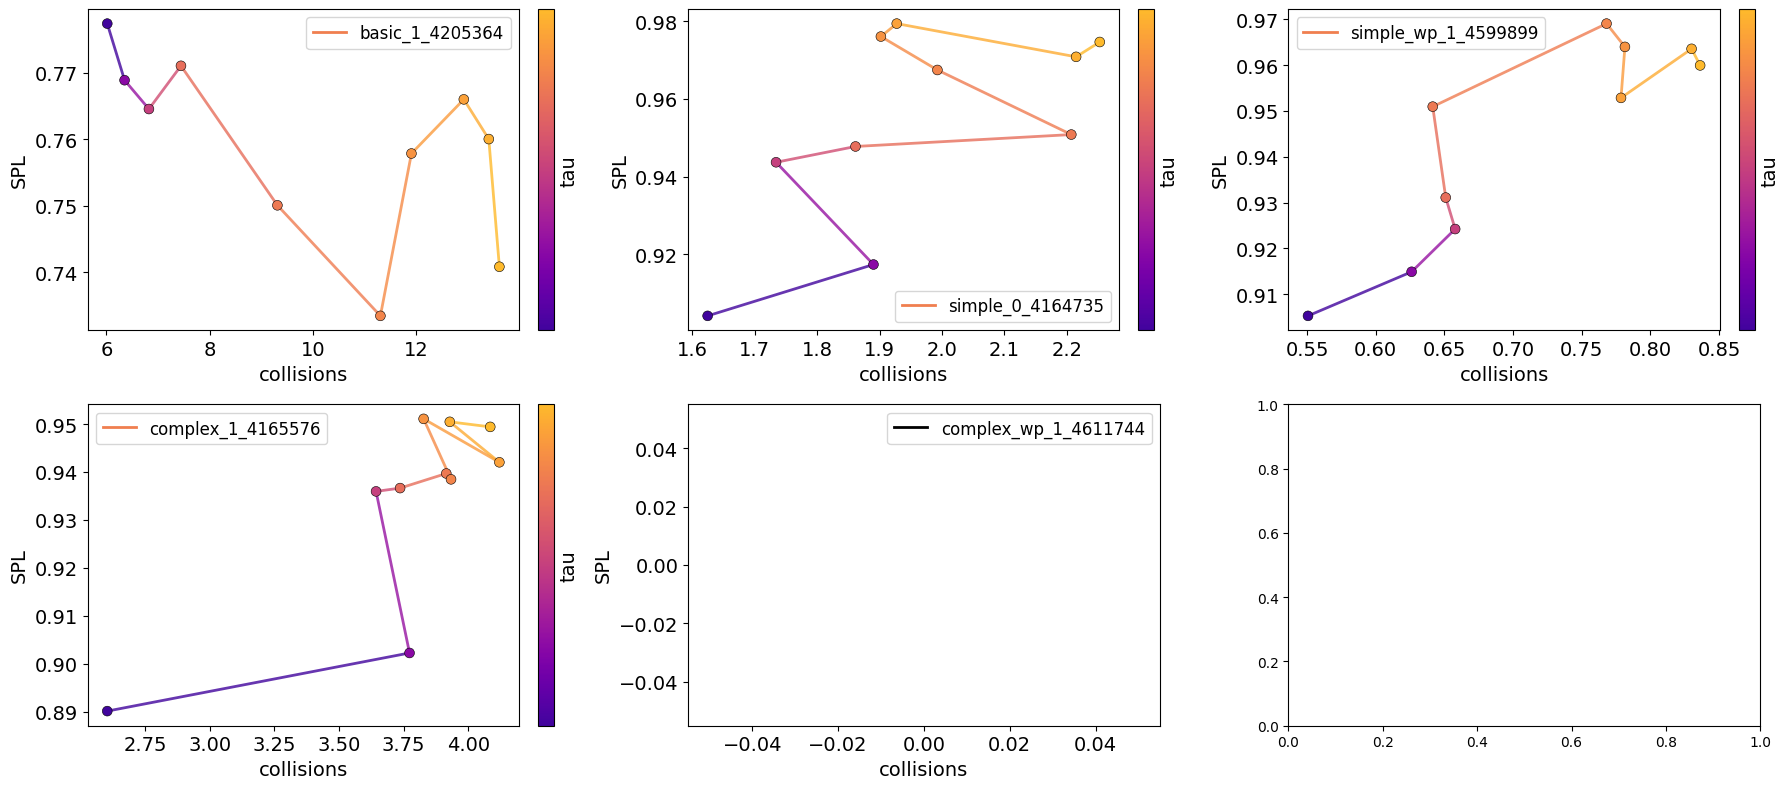

In [10]:
multy_plot_filtered(csvs, 'collisions', 'SPL', 3, lambda x: ( x['path_tortuosity'] < 1.2), 0.05)

COSA VOGLIO FARE

1. testare con cbf SENZA min forward velocit. Per come è ora troppe collisioni inutili e premiano attivazioni siperflue, magari  ridurre b_safe.

QUELLO CHE SAPPIAMO

    1. Esiste generalmente un valore di tau per cui la policy collide meno e raggiuge successo molto simile a prima, ottimo compromesso. l'attivazione non sistematica delle CBF beneficia le prestazioni

COSA SAREBBE INTERESSANTE SAPERE

    1. Analisi su Tau: esiste un modo più concreto per individuare tau o un meccanismo migliore per usare l'incertezza (non un solo valore ma valori per osservazione)? incertezza epistemica?

    2. Indipendensa tra UF e distanza ostacoli: controllare la dipendenza tra le due metriche, non dovrebbe essere troppo forte, soprattutto in un ambiente OOD

    3. Robustezza in Scenari OOD: Se l'incertezza è veramente epistemica deve funzionare bene in ambienti OOD, problema: quali sono ambienti OOD che però sono gestiti bene dalle CBF e quindi le collisioni sono il problema prevenibile?

    4. Capacità Anticipatoria dell'Incertezza: (già  visto in test tesi) riuscire a verificare e valutare quanto il UF è anticipatorio di un pericolo. (magari test con UF e non CBF per controllare attivazioni e collisioni)

Baseline:
LagSAC (SAC con Lagrangiana e poi PPO)

Test:
cilindri fissi
cilindri in movimento

Metriche:
Smoothness

NON METTERE GOAL NEGLI ANGOLI O VICINO AI MURI

In [11]:
with open('./remote_results/final_results/SAMPLE15_0900_5452656_transitions.json', 'r') as f:
    tr = json.loads(f.read())
with open('./remote_results/final_results/SAMPLE15_0900_5452656_info.json', 'r') as f:
    info = json.loads(f.read())

In [12]:
ue = load_trained_ensemble('./unc_models_sample/unc_simple_0_4164735', (21+7)*4 + 2, (21 + 7), 'cpu')[0]

Caricamento di 10 modelli elite...


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_density_analysis(dist_array, unc_array, name_unc="Epistemica", bins=40):
    """
    Crea un Joint Plot: 
    - Scatter 2D discretizzato (Hexbin) per la densità.
    - Istogrammi marginali sugli assi per la distribuzione singola.
    """
    # Creiamo la figura con una griglia per i marginali
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0.1)

    # Assi principale, superiore (istogramma X) e laterale (istogramma Y)
    ax_joint = fig.add_subplot(gs[1:4, 0:3])
    ax_marg_x = fig.add_subplot(gs[0, 0:3], sharex=ax_joint)
    ax_marg_y = fig.add_subplot(gs[1:4, 3], sharey=ax_joint)

    # 1. Plot Principale: Discretizzazione 2D con Hexbin
    # Cmin=1 evita di colorare le zone con zero campioni
    hb = ax_joint.hexbin(dist_array, unc_array, gridsize=bins, 
                         cmap='viridis', bins='log', mincnt=1)
    
    # 2. Istogramma Superiore (Distanza Ostacoli)
    ax_marg_x.hist(dist_array, bins=bins, color='navy', alpha=0.7, rwidth=0.8)
    ax_marg_x.set_title(f"Distribuzione Incertezza {name_unc} vs Distanza Ostacoli", fontsize=14)
    
    # 3. Istogramma Laterale (Incertezza)
    ax_marg_y.hist(unc_array, bins=bins, orientation='horizontal', 
                   color='darkred', alpha=0.7, rwidth=0.8)

    # Pulizia layout: rimuoviamo le label degli assi marginali
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Labels assi principali
    ax_joint.set_xlabel("Distanza Minima Ostacoli (Normalizzata)", fontsize=12)
    ax_joint.set_ylabel(f"Incertezza {name_unc}", fontsize=12)

    # Aggiungiamo la colorbar per la densità
    cb_ax = fig.add_axes([0.95, 0.25, 0.02, 0.5]) # [left, bottom, width, height]
    fig.colorbar(hb, cax=cb_ax, label='Log10(Conteggio punti)')

    plt.show()

# Esempio di utilizzo:
# plot_density_analysis(dist_minima, epi_plot, name_unc="Epistemica")

In [14]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

def sample_ep_ad_plot(transitions, info, ensamble):

    random_idx = random.randrange(len(info))
    print(f'episodio scelto: {random_idx}')
    
    ep = torch.tensor(transitions[random_idx], dtype=torch.float32, device='cpu')
    i = info[random_idx]
    
    aleatoria, epistemica = predict_uncertainty(ensamble, ep)
    
    mean_dist = ep[:,21*3: 21*4].mean(dim=1).numpy()
    
    
    return plot_density_analysis(mean_dist, epistemica.numpy())

episodio scelto: 1873


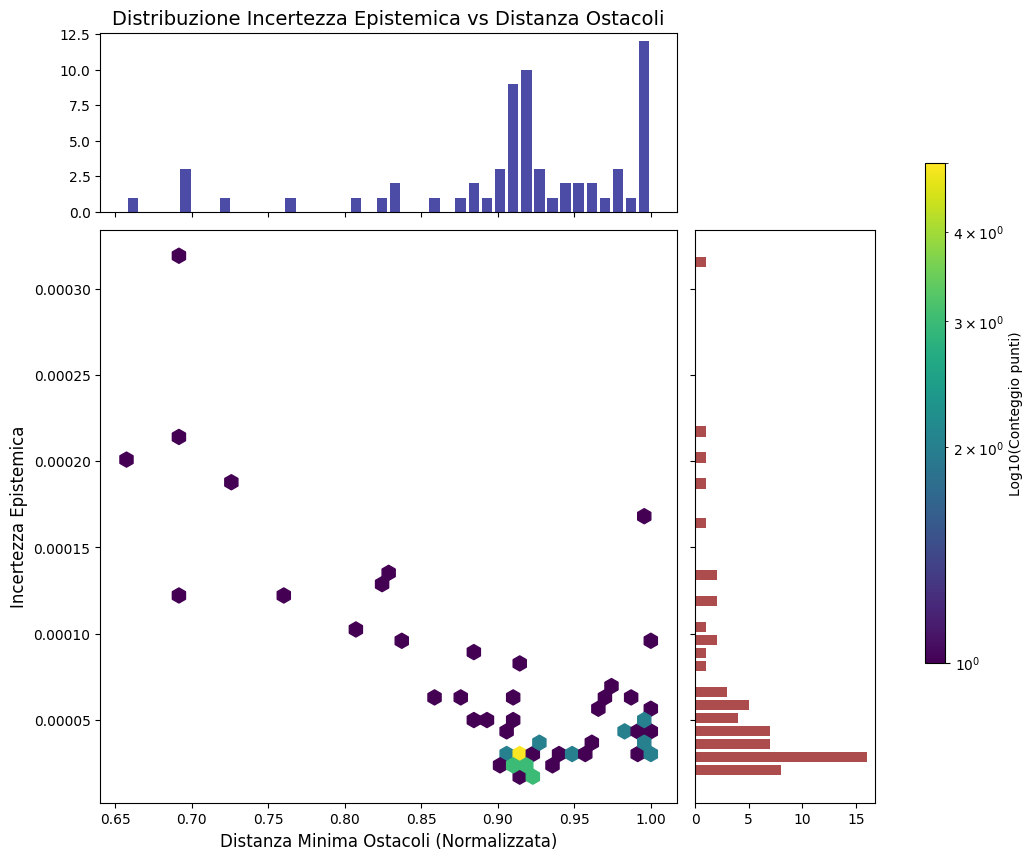

In [15]:
sample_ep_ad_plot(tr, info['data'], ue)